In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# example text for model training (SMS messages)
simple_train = ['call you tonight', 'Call me a cab', 'Please call me... PLEASE!']

In [4]:
# import and instantiate CountVectorizer (with the default parameters)
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()

# learn the 'vocabulary' of the training data (occurs in-place)
bow=vect.fit_transform(simple_train)

# examine the fitted vocabulary
features=vect.get_feature_names()
# bow
features

['cab', 'call', 'me', 'please', 'tonight', 'you']

In [5]:
# convert sparse matrix to a dense matrix
bow.toarray()

array([[0, 1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 0],
       [0, 1, 1, 2, 0, 0]], dtype=int64)

In [6]:
# examine the vocabulary and document-term matrix together
pd.DataFrame(bow.toarray(), columns=features)

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [7]:
# check the type of the document-term matrix
print(type(bow))

# examine the sparse matrix contents
print(bow)

<class 'scipy.sparse.csr.csr_matrix'>
  (0, 1)	1
  (0, 5)	1
  (0, 4)	1
  (1, 1)	1
  (1, 2)	1
  (1, 0)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	2


In [8]:
# example text for model testing
simple_test = ["please don't call me"]

In [9]:
# transform testing data into a document-term matrix (using existing vocabulary)
simple_test_dtm = vect.transform(simple_test)
simple_test_dtm.toarray()

array([[0, 1, 1, 1, 0, 0]], dtype=int64)

In [10]:
# examine the vocabulary and document-term matrix together
pd.DataFrame(simple_test_dtm.toarray(), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0,1,1,1,0,0


Reading a text-based dataset into pandas

In [11]:
# read file into pandas using a relative path
df = pd.read_csv("spam.csv", encoding='latin-1')
df.dropna(how="any", inplace=True, axis=1)
df.columns = ['label', 'message']

df.head()
# df.shape

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


 Exploratory Data Analysis (EDA)

In [12]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [13]:
df.groupby('label').count()

,message
label,
ham,4825
spam,747


In [14]:
# We have 4825 ham message and 747 spam message

In [15]:
df['label_num']=df.label.map({'ham':0,"spam":1})
df.tail()

,label,message,label_num
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0
5571,ham,Rofl. Its true to its name,0


In [16]:
df['message_len'] = df.message.apply(len)
df.head()

,label,message,label_num,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


Text(0.5, 0, 'Message Length')

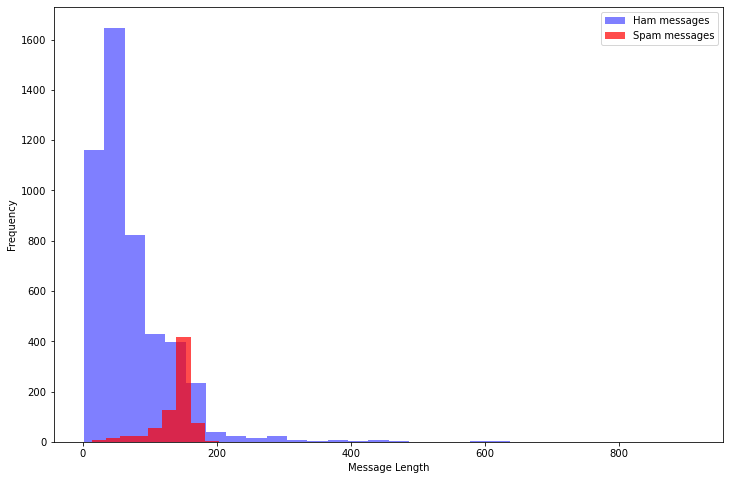

In [17]:
plt.figure(figsize=(12, 8))

df[df.label=='ham'].message_len.plot(bins=30, kind='hist', color='blue', 
                                       label='Ham messages', alpha=0.5)
df[df.label=='spam'].message_len.plot( kind='hist', color='red', 
                                       label='Spam messages', alpha=0.7)
plt.legend()
plt.xlabel("Message Length")

In [18]:
df[df.label=='ham'].describe()

,label_num,message_len
count,4825.0,4825.000000
mean,0.0,71.023627
std,0.0,58.016023
min,0.0,2.000000
25%,0.0,33.000000
50%,0.0,52.000000
75%,0.0,92.000000
max,0.0,910.000000


In [19]:
df[df.label=='spam'].describe()

,label_num,message_len
count,747.0,747.000000
mean,1.0,138.866131
std,0.0,29.183082
min,1.0,13.000000
25%,1.0,132.500000
50%,1.0,149.000000
75%,1.0,157.000000
max,1.0,224.000000


In [20]:
# Woah! 910 characters, let's use masking to find this message(ham msg):

df[df.message_len == 910]['message'][1084]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

 Text Pre-processing

In [21]:
import string
from nltk.corpus import stopwords
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [22]:
#     Takes in a string of text, then performs the following:
#     1. Remove all punctuation
#     2. Remove all stopwords
#     3. Returns a list of the cleaned text


In [23]:
def text_process(mess):
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return ' '.join([word.lower() for word in nopunc.split() if word.lower() not in STOPWORDS])

In [24]:
df.head()

,label,message,label_num,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


In [25]:
# Now let's "tokenize" these messages. Tokenization is just the term used to describe the process of converting the normal 
# text strings in to a list of tokens (words that we actually want).

In [26]:
# this will remove punctuation or any stopword from the message
df['clean_msg'] = df.message.apply(text_process)
df.head()

,label,message,label_num,message_len,clean_msg
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,29,ok lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,free entry wkly comp win fa cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,0,49,dun say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,nah think goes usf lives around though


In [27]:
from collections import Counter

words_ham = df[df.label=='ham'].clean_msg.apply(lambda x: x.split())
# words
ham_words = Counter()

for msg in words_ham:
    ham_words.update(msg)
    
print(ham_words.most_common(50))

[('get', 303), ('ltgt', 276), ('ok', 272), ('go', 247), ('ill', 236), ('know', 232), ('got', 231), ('like', 229), ('call', 229), ('come', 224), ('good', 222), ('time', 189), ('day', 187), ('love', 185), ('going', 167), ('want', 163), ('one', 162), ('home', 160), ('lor', 160), ('need', 156), ('sorry', 153), ('still', 146), ('see', 137), ('n', 134), ('later', 134), ('da', 131), ('r', 131), ('back', 129), ('think', 128), ('well', 126), ('today', 125), ('send', 123), ('tell', 121), ('cant', 118), ('ì', 117), ('hi', 117), ('take', 112), ('much', 112), ('oh', 111), ('night', 107), ('hey', 106), ('happy', 105), ('great', 100), ('way', 100), ('hope', 99), ('pls', 98), ('work', 96), ('wat', 95), ('thats', 94), ('dear', 94)]


In [28]:
words_spam = df[df.label=='spam'].clean_msg.apply(lambda x: x.split())

# words
spam_words = Counter()

for msg in words_spam:
    spam_words.update(msg)
    
print(spam_words.most_common(50))

[('call', 347), ('free', 216), ('txt', 150), ('mobile', 123), ('text', 120), ('claim', 113), ('stop', 113), ('reply', 101), ('prize', 92), ('get', 83), ('new', 69), ('send', 67), ('nokia', 65), ('urgent', 63), ('cash', 62), ('win', 60), ('contact', 56), ('service', 55), ('please', 52), ('guaranteed', 50), ('customer', 49), ('16', 49), ('week', 49), ('tone', 48), ('per', 46), ('phone', 45), ('18', 43), ('chat', 42), ('awarded', 38), ('draw', 38), ('latest', 36), ('å£1000', 35), ('line', 35), ('150ppm', 34), ('mins', 34), ('receive', 33), ('camera', 33), ('1', 33), ('every', 33), ('message', 32), ('holiday', 32), ('landline', 32), ('shows', 31), ('å£2000', 31), ('go', 31), ('box', 30), ('number', 30), ('apply', 29), ('code', 29), ('live', 29)]


Vectorization

In [29]:
# Now we'll convert each message, represented as a list of tokens (lemmas) above, into a vector 
# that machine learning models can understand.

In [30]:
# split X and y into training and testing sets 
from sklearn.model_selection import train_test_split

# how to define X and y (from the SMS data) for use with COUNTVECTORIZER
X = df.clean_msg
y = df.label_num
# print(X.shape)
# print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4179,)
(1393,)
(4179,)
(1393,)


In [31]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer()

# combine fit and transform into a single step
X_train_dtm = vect.fit_transform(X_train)


# examine the document-term matrix
print(type(X_train_dtm), X_train_dtm.shape)

# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
print(type(X_test_dtm), X_test_dtm.shape)

<class 'scipy.sparse.csr.csr_matrix'> (4179, 7996)
<class 'scipy.sparse.csr.csr_matrix'> (1393, 7996)


In [32]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit_transform(X_train_dtm)

<4179x7996 sparse matrix of type '<class 'numpy.float64'>'
	with 34796 stored elements in Compressed Sparse Row format>

Building and evaluating a model

In [53]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [54]:
# train the model using X_train_dtm (timing it with an IPython "magic command")
%time nb.fit(X_train_dtm, y_train)

Wall time: 0 ns


MultinomialNB()

In [55]:
from sklearn import metrics

# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

# calculate accuracy of class predictions
print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test, y_pred_class))

print("\n")

# print the confusion matrix
print("=======Confision Matrix===========")
metrics.confusion_matrix(y_test, y_pred_class)

=======Accuracy Score===========
0.9827709978463748


=======Confision Matrix===========


array([[1205,    8],
       [  16,  164]], dtype=int64)

In [60]:
# print message text for false positives (ham incorrectly classifier)
X_test[(y_pred_class==1) & (y_test==0)]
# prediction is they are spam messages when they are not spam 
# X_test[y_pred_class > y_test]

2418    madamregret disturbancemight receive reference...
4598                                laid airtel line rest
386                                   customer place call
1289    heygreat dealfarm tour 9am 5pm 95pax 50 deposi...
5094    hi shanilrakhesh herethanksi exchanged uncut d...
494                                      free nowcan call
759     call youcarlos isare phones vibrate acting mig...
3140                                  customer place call
Name: clean_msg, dtype: object

In [37]:
# prediction is they are non-spam messages when they are spam
# print message text for false negatives (spam incorrectly classifier)
X_test[y_pred_class < y_test]

4674    hi babe chloe r smashed saturday night great w...
3528    xmas new years eve tickets sale club day 10am ...
3417    life never much fun great came made truly spec...
2773    come takes little time child afraid dark becom...
1960    guess somebody know secretly fancies wanna fin...
5       freemsg hey darling 3 weeks word back id like ...
2078                         85233 freeringtonereply real
1457    claire havin borin time alone wanna cum 2nite ...
190     unique enough find 30th august wwwareyouunique...
2429    guess ithis first time created web page wwwasj...
3057    unsubscribed services get tons sexy babes hunk...
1021    guess somebody know secretly fancies wanna fin...
4067    tbspersolvo chasing us since sept forå£38 defi...
3358         sorry missed call lets talk time 07090201529
2821    romcapspam everyone around responding well pre...
2247    back work 2morro half term c 2nite sexy passio...
Name: clean_msg, dtype: object

In [70]:
# calculate predicted probabilities for X_test_dtm (poorly calibrated)
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
# y_pred_prob.shape
# X_test_dtm.shape
y_pred_prob
# doubt

array([2.11903975e-02, 3.97831612e-04, 1.06470895e-03, ...,
       1.31939653e-02, 9.99821127e-05, 6.04083365e-06])

In [40]:
# calculate AUC
metrics.roc_auc_score(y_test, y_pred_prob)

0.9774342768159751

In [41]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

pipe = Pipeline([('bow', CountVectorizer()), 
                 ('tfid', TfidfTransformer()),  
                 ('model', MultinomialNB())])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

# calculate accuracy of class predictions
print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test, y_pred))

# print the confusion matrix
print("=======Confusion Matrix===========")
metrics.confusion_matrix(y_test, y_pred)

=======Accuracy Score===========
0.9669777458722182
=======Confusion Matrix===========


array([[1213,    0],
       [  46,  134]], dtype=int64)

 Comparing Models

In [71]:
# import an instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear')


# For small to medium-sized datasets, the 'liblinear' solver is a good choice. 
# It is suitable for both binary and multiclass problems and can handle L1 and L2 regularization.



# train the model using X_train_dtm
%time logreg.fit(X_train_dtm, y_train)

Wall time: 20.1 ms


LogisticRegression(solver='liblinear')

In [43]:
# make class predictions for X_test_dtm
y_pred_class = logreg.predict(X_test_dtm)

# calculate predicted probabilities for X_test_dtm (well calibrated)
y_pred_prob = logreg.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([0.01694418, 0.0152182 , 0.08261755, ..., 0.02198942, 0.00531726,
       0.00679188])

In [44]:
# calculate accuracy of class predictions
print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test, y_pred_class))
print("\n")
# print the confusion matrix
print("=======Confision Matrix===========")
print(metrics.confusion_matrix(y_test, y_pred_class))
print("\n")
# calculate AUC
print("=======ROC AUC Score===========")
print(metrics.roc_auc_score(y_test, y_pred_prob))

=======Accuracy Score===========
0.9842067480258435


=======Confision Matrix===========
[[1213    0]
 [  22  158]]


=======ROC AUC Score===========
0.9835714940001832


Tuning the vectorizer

In [74]:
# show default parameters for CountVectorizer
vect

CountVectorizer(ngram_range=(1, 2))

In [75]:
# remove English stop words
vect = CountVectorizer(stop_words='english')

In [76]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))
# both min, max is included

In [77]:
# ignore terms that appear in more than 50% of the documents
vect = CountVectorizer(max_df=0.5)

In [78]:
# only keep terms that appear in at least 2 documents
vect = CountVectorizer(min_df=2)